In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [2]:
tf.config.experimental.set_memory_growth(tf.config.experimental.list_physical_devices('GPU')[0], True)

In [3]:
def plotImg(img):
    fig, axes= plt.subplots(1,10, figsize=(20,20))
    axes=axes.flatten()
    for img, ax in zip(img, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [4]:
%cd ../data

/home/amuzak/Hindi-On-Web/data


In [5]:
train_batch=ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet.preprocess_input) \
    .flow_from_directory(
                        directory='train',
                        target_size=(224,224),
                        classes=['va','5', 'ae', '3', 'sa', 'bha', 'da', '7', 'cha', '2', 'la', 'ana', 'ka', 
                                 'pa', 'aa','gha', 'tra', 'ta', 'tha', 'chha', 'ang', 'yna', 'taa', 'dhaa',
                                  '6', 'na', 'ga', 'o', 'gya', '8', 'kha', 'ma', 'thaa', 'ra', 'aha', 'ai',
                                  'a', 'sha', 'oo', 'au', 'pha', 'ee', '4', 'dha', '9', 'u', 'daa', 'i', '1',
                                  'ha', 'rda', 'ba', 'ksha', 'jha', 'katasha', '0', 'ja', 'ya'],
                        batch_size=30
                        )
val_batch=ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet.preprocess_input) \
    .flow_from_directory(
                        directory='val',
                        target_size=(224,224),
                        classes=['va','5', 'ae', '3', 'sa', 'bha', 'da', '7', 'cha', '2', 'la', 'ana', 'ka', 
                                 'pa', 'aa','gha', 'tra', 'ta', 'tha', 'chha', 'ang', 'yna', 'taa', 'dhaa',
                                  '6', 'na', 'ga', 'o', 'gya', '8', 'kha', 'ma', 'thaa', 'ra', 'aha', 'ai',
                                  'a', 'sha', 'oo', 'au', 'pha', 'ee', '4', 'dha', '9', 'u', 'daa', 'i', '1',
                                  'ha', 'rda', 'ba', 'ksha', 'jha', 'katasha', '0', 'ja', 'ya'],
                        batch_size=10
                        )

Found 10384 images belonging to 58 classes.
Found 1264 images belonging to 58 classes.
Found 1264 images belonging to 58 classes.


In [6]:
imgs, labels=next(train_batch)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

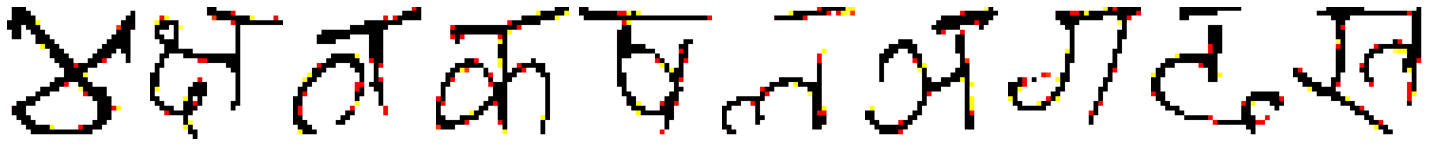

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [7]:
plotImg(imgs)
print(labels)

In [8]:
model=Sequential([
    Conv2D(filters=32, kernel_size=(4,4), activation='relu', padding='same', input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2,2), strides=2),
    
    Conv2D(filters=64, kernel_size=(4,4), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2,2), strides=2),
    
    Conv2D(filters=128, kernel_size=(4,4), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2,2), strides=2),
    
    Flatten(),
    Dense(units=58, activation='softmax')
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      32832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 128)       131200    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 100352)            0

In [10]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
model.fit(x=train_batch, validation_data=val_batch, epochs=20,  verbose=1, steps_per_epoch=346, validation_steps=42)

Epoch 1/20
346/346 [==============================] - 52s 150ms/step - loss: 5.6807 - accuracy: 0.5734 - val_loss: 0.8720 - val_accuracy: 0.7143
Epoch 2/20
346/346 [==============================] - 51s 149ms/step - loss: 0.2429 - accuracy: 0.9316 - val_loss: 0.7746 - val_accuracy: 0.7690
Epoch 3/20
346/346 [==============================] - 52s 151ms/step - loss: 0.0431 - accuracy: 0.9887 - val_loss: 0.7769 - val_accuracy: 0.7995
Epoch 4/20
346/346 [==============================] - 52s 149ms/step - loss: 0.0094 - accuracy: 0.9979 - val_loss: 0.8698 - val_accuracy: 0.7881
Epoch 5/20
346/346 [==============================] - 52s 149ms/step - loss: 0.0052 - accuracy: 0.9989 - val_loss: 0.9201 - val_accuracy: 0.7905
Epoch 6/20
346/346 [==============================] - 52s 151ms/step - loss: 0.0082 - accuracy: 0.9976 - val_loss: 1.0513 - val_accuracy: 0.8213
Epoch 7/20
346/346 [==============================] - 52s 151ms/step - loss: 0.0191 - accuracy: 0.9943 - val_loss: 1.0217 - val_ac

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

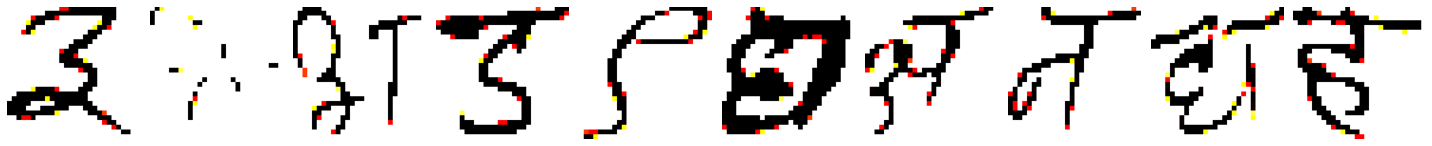

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0

In [15]:
test_imgs, test_labels=next(test_batch)
plotImg(test_imgs)
print(test_labels)

In [18]:
test_batch.classes

array([ 0,  0,  0, ..., 57, 57, 57], dtype=int32)

In [17]:

test_batch=ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet.preprocess_input) \
    .flow_from_directory(
                        directory='test',
                        target_size=(224,224),
                        classes=['va','5', 'ae', '3', 'sa', 'bha', 'da', '7', 'cha', '2', 'la', 'ana', 'ka', 
                                 'pa', 'aa','gha', 'tra', 'ta', 'tha', 'chha', 'ang', 'yna', 'taa', 'dhaa',
                                  '6', 'na', 'ga', 'o', 'gya', '8', 'kha', 'ma', 'thaa', 'ra', 'aha', 'ai',
                                  'a', 'sha', 'oo', 'au', 'pha', 'ee', '4', 'dha', '9', 'u', 'daa', 'i', '1',
                                  'ha', 'rda', 'ba', 'ksha', 'jha', 'katasha', '0', 'ja', 'ya'],
                        batch_size=10,
                        shuffle=False
                        )

Found 1264 images belonging to 58 classes.


In [19]:
predictions=model.predict(x=test_batch, verbose=0, steps=42)

In [20]:
np.round(predictions)

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [21]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [22]:
test_batch.class_indices

{'va': 0,
 '5': 1,
 'ae': 2,
 '3': 3,
 'sa': 4,
 'bha': 5,
 'da': 6,
 '7': 7,
 'cha': 8,
 '2': 9,
 'la': 10,
 'ana': 11,
 'ka': 12,
 'pa': 13,
 'aa': 14,
 'gha': 15,
 'tra': 16,
 'ta': 17,
 'tha': 18,
 'chha': 19,
 'ang': 20,
 'yna': 21,
 'taa': 22,
 'dhaa': 23,
 '6': 24,
 'na': 25,
 'ga': 26,
 'o': 27,
 'gya': 28,
 '8': 29,
 'kha': 30,
 'ma': 31,
 'thaa': 32,
 'ra': 33,
 'aha': 34,
 'ai': 35,
 'a': 36,
 'sha': 37,
 'oo': 38,
 'au': 39,
 'pha': 40,
 'ee': 41,
 '4': 42,
 'dha': 43,
 '9': 44,
 'u': 45,
 'daa': 46,
 'i': 47,
 '1': 48,
 'ha': 49,
 'rda': 50,
 'ba': 51,
 'ksha': 52,
 'jha': 53,
 'katasha': 54,
 '0': 55,
 'ja': 56,
 'ya': 57}

In [24]:
predictions

array([[1.00000000e+00, 2.70546453e-15, 2.42660128e-19, ...,
        2.59294946e-13, 2.78793854e-16, 1.67825738e-14],
       [9.89766777e-01, 2.52311139e-13, 2.64461064e-10, ...,
        1.14847056e-13, 4.65341758e-11, 8.44908129e-07],
       [9.35315490e-01, 1.29028244e-13, 1.30966174e-13, ...,
        1.13224763e-08, 1.53872026e-10, 7.22632098e-15],
       ...,
       [1.07388441e-04, 2.55443648e-12, 1.78248509e-08, ...,
        1.59097749e-10, 7.85769019e-12, 2.22108931e-09],
       [3.54152519e-07, 2.58233479e-16, 3.44817797e-09, ...,
        8.00202084e-17, 3.90334466e-15, 1.84354726e-10],
       [4.63827794e-27, 9.10000980e-17, 5.24735128e-24, ...,
        1.02184776e-14, 5.67428896e-21, 7.15804725e-29]], dtype=float32)

In [25]:
cm = confusion_matrix(y_true=test_batch.classes, y_pred=np.argmax(predictions))

TypeError: Singleton array 0 cannot be considered a valid collection.

In [26]:
!pwd

/home/amuzak/Hindi-On-Web/data


In [27]:
model.save('../weights/prototype.h5')